* This notebook was made to compare the Rmix, location of near and far field of each run case between different river flow scenarios.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [31]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
#janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [32]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
#janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [33]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
#janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

* Look at stratification at some stations for each case under different river flow conditions.

In [6]:
def plot_S_stra(grid_T1,grid_T2,grid_T3,tst,ted,dep_ind,stn,strings,smin = 0,smax = 33):
    """This function was made to compare stratification for selected run case
    with those under different river flow periods."""
    S_stn = {}; origin ='lower';
    fig, axs = plt.subplots(1,3,figsize = (20,5))
    for grid_T, ax,string in zip([grid_T1,grid_T2,grid_T3],axs,strings):
        S = grid_T.variables['vosaline']
        t = grid_T.variables['time_counter']
        dep_T = grid_T.variables['deptht']
        S_stn[string] = S[:,:,sites[stn]['j'],sites[stn]['i']]
        ## mask
        tmask_point = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask_point) 
        np_mask=np_mask +np.zeros(S_stn[string].shape) 
        S_stn[string] = np.ma.masked_array(S_stn[string],mask=np_mask) ## mask sal=0 by tmask
        time_inds = np.arange(S.shape[0]) ## Define time
        ## stra
        CS= ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[string][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        #CS2 = ax.contour(CS,colors = 'k', origin=origin,hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        #cbar.add_lines(CS2)
        cbar.set_label('Practical Salinity')
        ax.set_title(string)
        ax.set_ylim([dep_T[dep_ind], dep_T[0]])
        ax.set_xlim(time_inds[tst],time_inds[ted])
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')

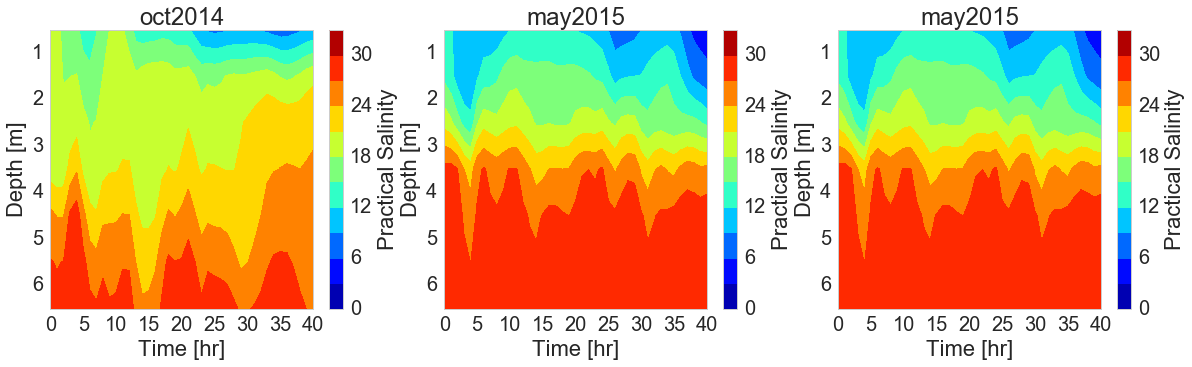

In [7]:
plot_S_stra(octriver_T,mayriver_T,mayriver_T,0,40,6,'Sandheads',['oct2014','may2015','may2015'])

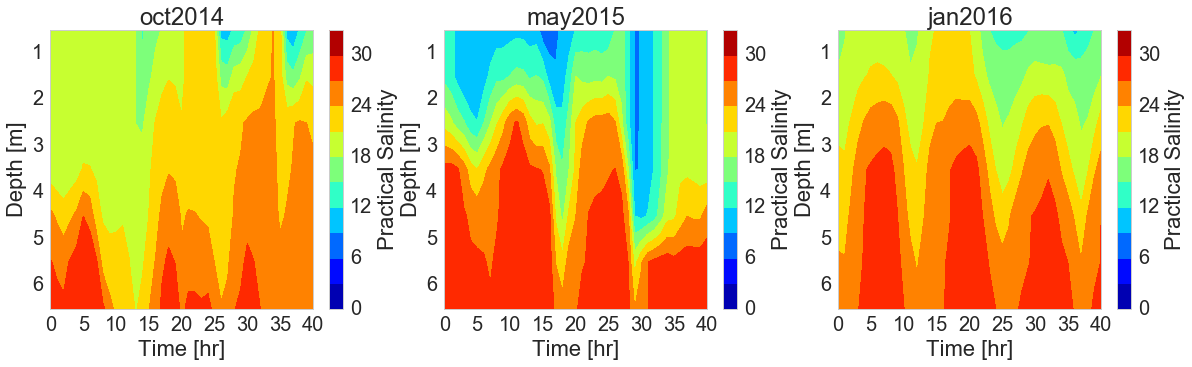

In [8]:
plot_S_stra(octall_T,mayall_T,janall_T,0,40,6,'Sandheads',['oct2014','may2015','jan2016'])

* Next, look at transition of near and far-field during weak wind, moderate wind and high wind under different river flow scenarios.

* weak wind

S_ref 26.6485
S_thre 25.5792752838
i,lon,real salinity 17 -123.449 17.1932
i,lon,real salinity 18 -123.444 16.9736
i,lon,real salinity 62 -123.215 16.9668
S_ref 19.1289
S_thre 17.0069270325
i,lon,real salinity 25 -123.407 24.0631
S_ref 25.2179
S_thre 23.9484008789


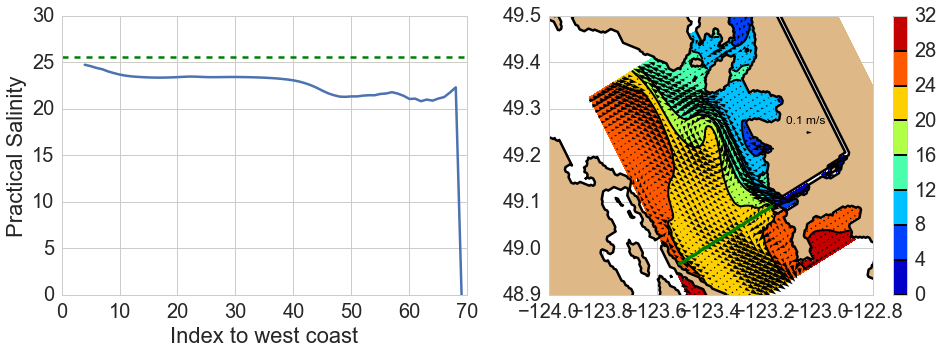

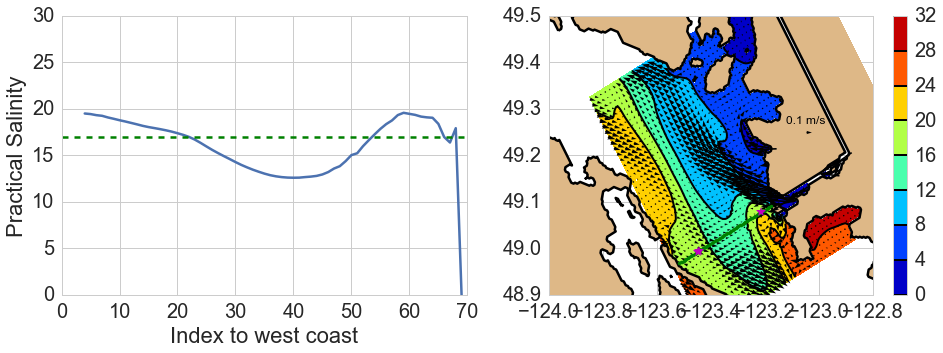

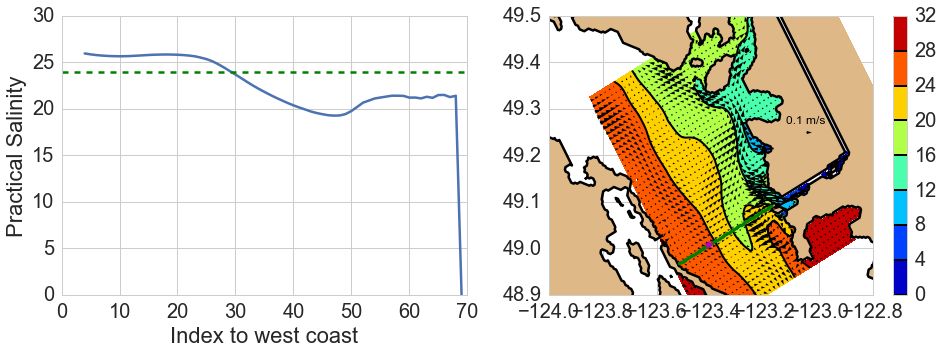

In [18]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,48,143,0,0.2) ## Oct 19~22, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,192,287,0,0.2) ## May 9~11, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,168,239,0,0.2) ## Jan 8~10, spring tides

In [34]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']

        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [41]:
def threshold_whole_domain(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind,strings):
    """This function was made to apply the near, far field threshold into the 
    whole domain and look at the range of near and far field plume, as well as
    the age of different plume region defined."""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    r_wind = rmix['river+winds']/rmix['all']
    r_tide = rmix['river+tides']/rmix['all']
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    levels = [0.1,0.3,0.5,0.7,0.9]
    origin = 'lower';
    fig, axs = plt.subplots(1,2,figsize = (16,5))
    for ax, r,ti in zip([axs[0],axs[1]],[r_wind,r_tide],strings):
        CS = ax.contourf(lon[:],lat[:],r[:],levels,cmap = 'jet',origin=origin,
                   extend='both')
        CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,
                  hold='on',linewidths=(2,))
        plt.clabel(CS2,fmt='%2.1f', colors='g',fontsize = 14)
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])
        ax.set_title(ti)

In [38]:
## load particle
particle = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct2014all/ariane_trajectories_qualitative.nc')
lon_par = particle.variables['traj_lon']
lat_par = particle.variables['traj_lat']

In [25]:
strings = ['rmix(wind)/rmix(all)','rmix(tide)/rmix(all)']

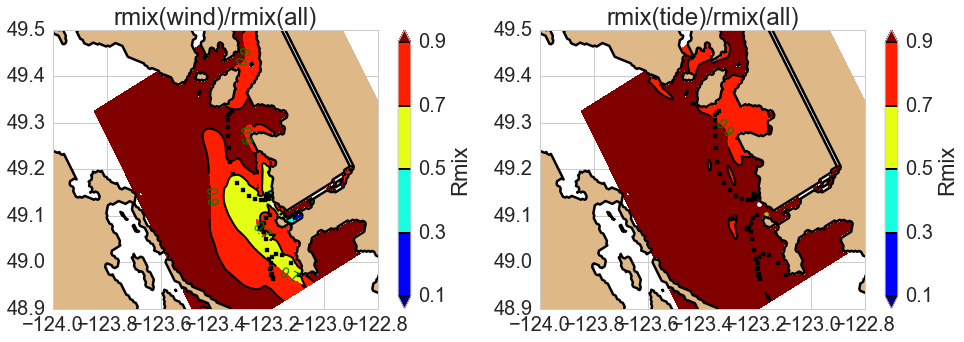

In [39]:
## the whole domain, weak winds + neap tides, oct 19~22
threshold_whole_domain(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10,strings = strings)

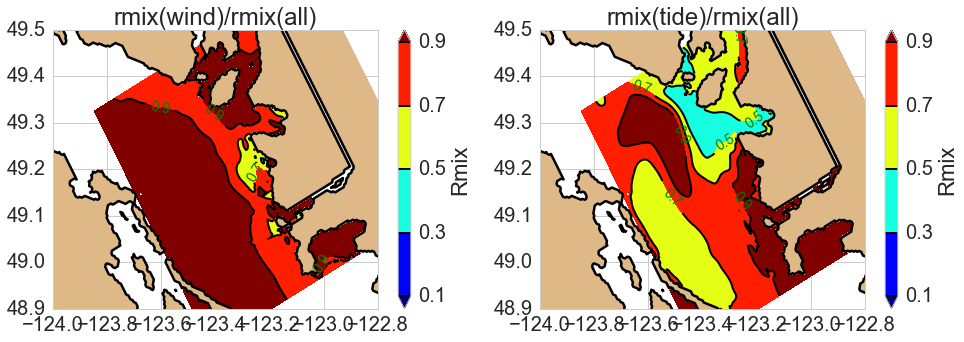

In [42]:
# the whole domain, weak winds + spring tides, may 9~11
threshold_whole_domain(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,192,287,10,strings = strings)

In [44]:
# the whole domain, weak winds + spring tides, jan 8~10
threshold_whole_domain(jannowind_T,jannowind_T,jannotide_T,jannof_T,janall_T,168,239,10,lon_par,lat_par,strings = strings)

NameError: name 'jannotide_T' is not defined